In [12]:
from matplotlib import pyplot as plt
import numpy as np
import sinesum as ss

# Approximating a function by a sum of sines
Jacob Anabi, Grady Lynch

2018-24-10

## Idea

Any function can be approximated using a sum of sines; this is also known as a Fourier series expansion of the original function.

For example, consider the following piecewise function in the interval $t\in[-T/2,T/2]$:

$$f(t) = \begin{cases}
             1, & 0 < t < T/2 \\
             0, & t = 0 \\
             -1, & -T/2 < t < 0
           \end{cases}$$

This function can be approximated by the limit:

$$\lim_{n\to\infty} S_n(t)$$

$$where$$

$$S_n(t) = \frac{4}{\pi}\sum_{k=1}^n \frac{1}{2k-1} \sin\left(\frac{2(2k-1)\pi t}{T}\right)$$

This idea of a function being approximated using a sum of sines can be programmed and plotted, and thus is shown below.

## Code, Approximations, and Plotting

For the following tests, we will be using the function and summation defined above.

### Approximations

For a $T$ value of $2\pi$, $f(\pi/2) = 1$

In [2]:
ss.func(np.pi/2)

1

Thus, $$\lim_{n\to\infty} S_n(\pi/2) = 1$$

In [3]:
ss.sum(np.pi/2, 100000)

0.9999968169011378

As we can see, the summation of sines is a good approximation of the piecewise function.

### Plotting

For the following plots, we will be plotting $S_n(t)$ with the following cases:

$n = 1, 3, 5, 10, 30, 100$ and $t = \alpha T$, with $T = 2\pi$ and $\alpha = 0.01, 0.25, 0.49$.

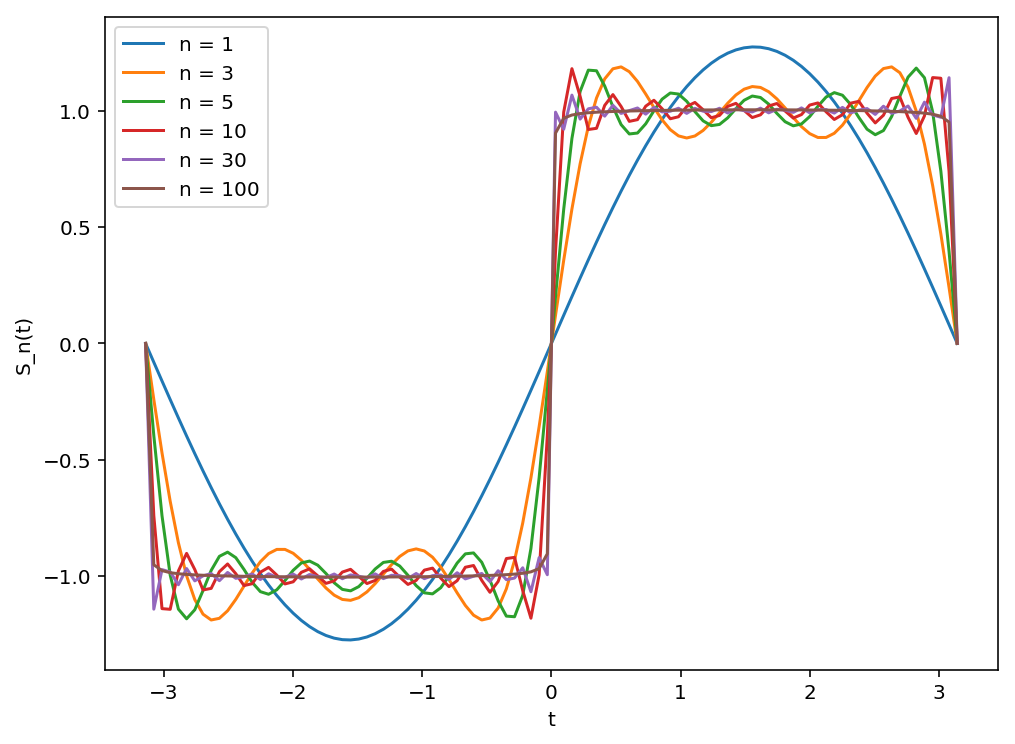

In [21]:
n = np.array([1, 3, 5, 10, 30, 100]) # creating a numpy array for n values of 1, 3, 5, 10, 30, 100

T = 2*np.pi # setting T to 2*pi

t = np.linspace(-T/2, T/2, num=100, endpoint=True) # creating a numpy array for t values between -T/2 and T/2

vsum = np.vectorize(ss.sum)
sums = np.array([vsum(t, num) for num in n]) # creating a 2-d numpy array of dimensions len(n) x len(t)

# Plotting
figure = plt.figure(figsize=(8,6)) # Setting the figure size (width, height)
axes = plt.axes() # Creating plot axes

num_index = 0 # keeping track of index of n array

for s in sums: # for each array in the 2-d numpy array sums
    axes.plot(t, s, label="n = {}".format(n[num_index])) # x-axis: t, y-axis: S_n(t), label: the n at each num_index (no out of bounds error, due to the width of sums = len(n
    num_index+=1 # increment num_index

axes.legend() # axes legend
plt.xlabel("t") # label x-axis
plt.ylabel("S_n(t)") #label y-axis
plt.show() # show the plot

As we can see, as $n$ increases the summation becomes more accurates to the appropriate approximation. Additionaly, the $\alpha$ values determines where the sum converges to.